<a href="https://colab.research.google.com/github/HoangLong1907/AI-TempoRun/blob/main/Nguycodotquy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_path = '/content/drive/MyDrive/AI Tempo Run/train.csv'
train = pd.read_csv(train_path)
print(train.shape)

(4000, 14)


Thông tin tập train

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   gender             4000 non-null   object 
 2   age                3893 non-null   float64
 3   hypertension       3770 non-null   float64
 4   heart_disease      3910 non-null   float64
 5   ever_married       4000 non-null   object 
 6   work_type          4000 non-null   object 
 7   Residence_type     4000 non-null   object 
 8   avg_glucose_level  3829 non-null   float64
 9   bmi                2884 non-null   float64
 10  smoking_status     4000 non-null   object 
 11  blood              3990 non-null   object 
 12  height             2928 non-null   float64
 13  stroke             4000 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 437.6+ KB


In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0


In [ ]:
test_path = '/content/drive/MyDrive/AI Tempo Run/public_test.csv'
test = pd.read_csv(test_path)
print(test.shape)
test.head()

(500, 13)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height
0,67,Female,17.0,0.0,0.0,No,Private,Urban,92.97,NaN,formerly smoked,AB,NaN
1,210,Male,81.0,0.0,0.0,Yes,Self-employed,Rural,91.54,31.4,never smoked,A,1.60
2,242,Male,4.0,NaN,0.0,No,children,Urban,98.56,17.5,Unknown,O,NaN
3,711,Male,81.0,0.0,NaN,Yes,Private,Rural,92.96,22.2,never smoked,AB,NaN
4,724,Male,17.0,0.0,0.0,No,Private,Rural,81.77,44.7,never smoked,O,1.34


Thông tin tập test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    object 
 2   age                489 non-null    float64
 3   hypertension       455 non-null    float64
 4   heart_disease      366 non-null    float64
 5   ever_married       500 non-null    object 
 6   work_type          500 non-null    object 
 7   Residence_type     500 non-null    object 
 8   avg_glucose_level  494 non-null    float64
 9   bmi                457 non-null    float64
 10  smoking_status     500 non-null    object 
 11  blood              500 non-null    object 
 12  height             376 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 50.9+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def Chart(data):
  fig,axes = plt.subplots(4,3, figsize = (15,20))

  sns.set_style('darkgrid')
  fig.suptitle('Biểu đồ thống kê')

  sns.countplot(ax=axes[0,0], data=data, x='gender')   #axes: vị trí tương ứng
  sns.countplot(ax=axes[0,1], data=data, x='age')   
  sns.countplot(ax=axes[0,2], data=data, x='hypertension')
  sns.countplot(ax=axes[1,0], data=data, x='heart_disease')
  sns.countplot(ax=axes[1,1], data=data, x='ever_married')
  sns.countplot(ax=axes[1,2], data=data, x='work_type')
  sns.countplot(ax=axes[2,0], data=data, x='Residence_type')
  sns.distplot(a=data['avg_glucose_level'], ax=axes[2,1], hist= True)
  sns.distplot(a=data['bmi'], ax=axes[2,2], hist= True)
  sns.countplot(ax=axes[3,0], data=data, x='smoking_status')
  sns.countplot(ax=axes[3,1], data=data, x='blood')
  sns.countplot(ax=axes[3,2], data=data, x='height')

  #sns.distplot(a=data['height'], ax=axes[2,0], hist= True)

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


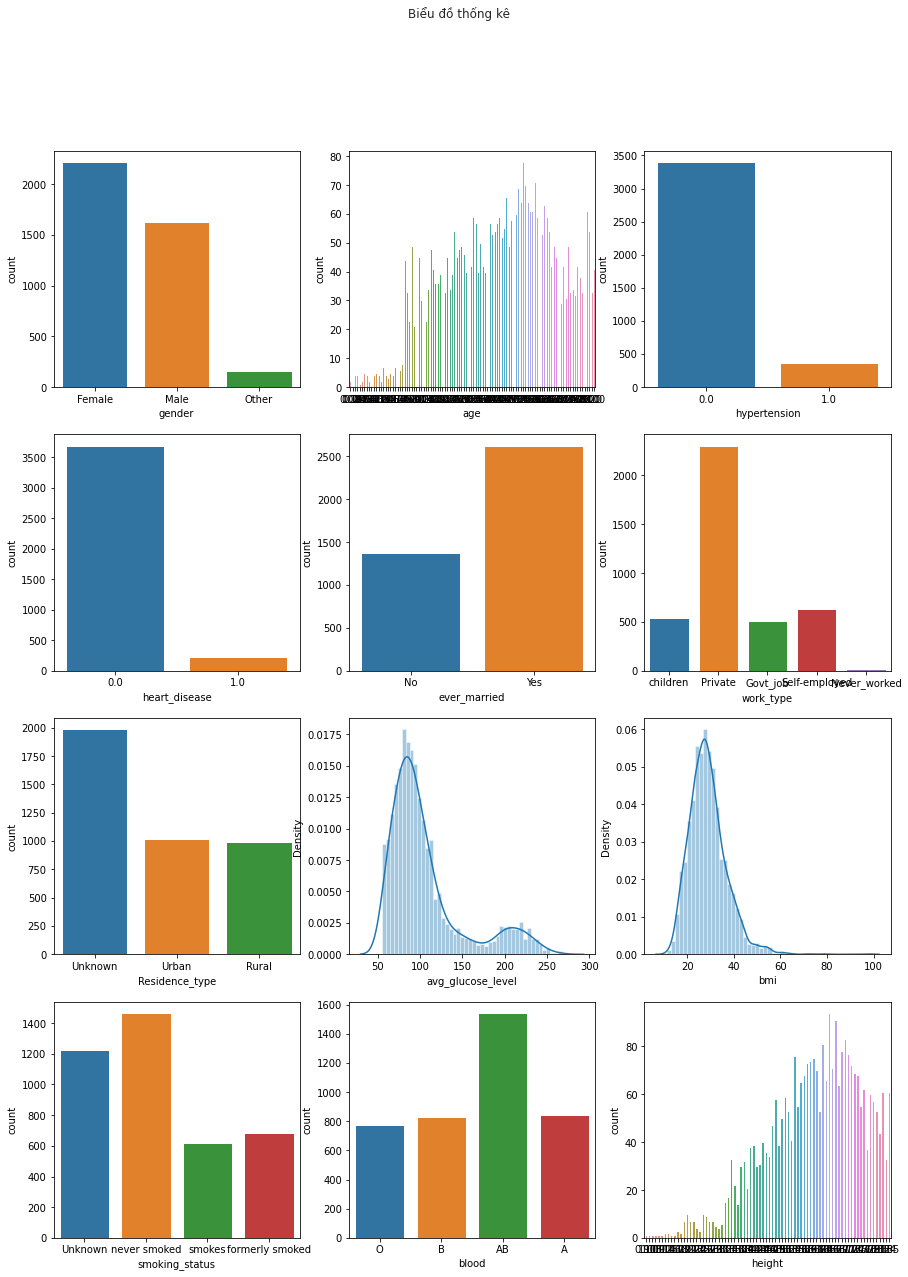

In [ ]:
Chart(train)

1:  130
0:  3870


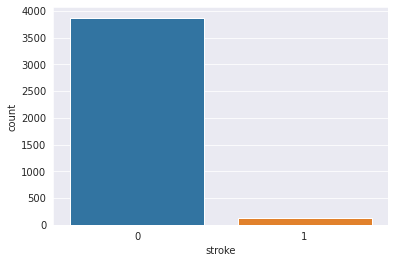

In [ ]:
sns.countplot(x='stroke', data=train)
print('1: ',sum(train.stroke==1))
print('0: ',sum(train.stroke==0))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


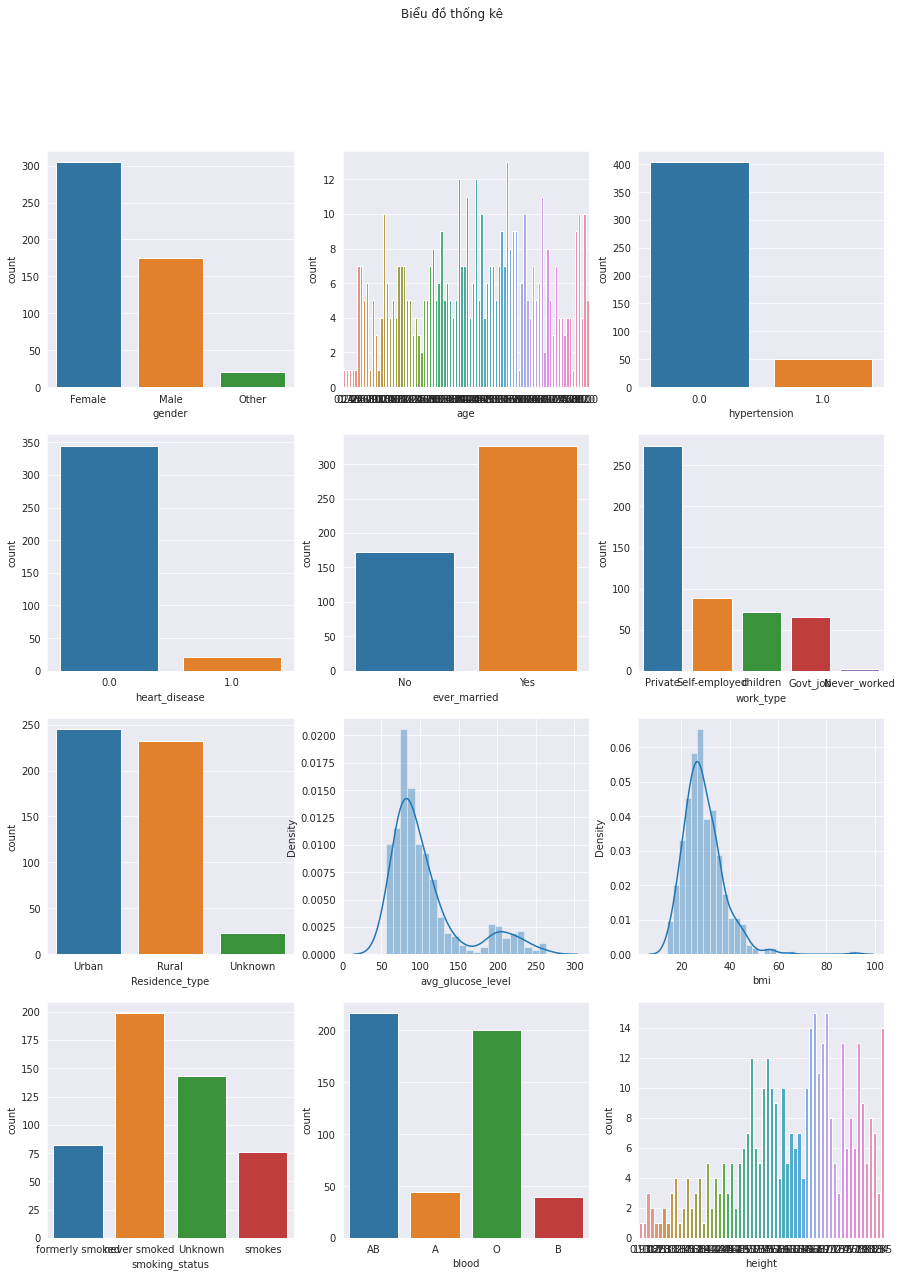

In [ ]:
Chart(test)

Huấn luyện mô hình

In [ ]:
#Drop cột id
train = train.drop(['id'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4000 non-null   object 
 1   age                3893 non-null   float64
 2   hypertension       3770 non-null   float64
 3   heart_disease      3910 non-null   float64
 4   ever_married       4000 non-null   object 
 5   work_type          4000 non-null   object 
 6   Residence_type     4000 non-null   object 
 7   avg_glucose_level  3829 non-null   float64
 8   bmi                2884 non-null   float64
 9   smoking_status     4000 non-null   object 
 10  blood              3990 non-null   object 
 11  height             2928 non-null   float64
 12  stroke             4000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 406.4+ KB


In [ ]:
#Xóa những cột có kiểu object
object_columns = [i for i in train.keys() if train[i].dtypes == object]
print(object_columns)

train = train.drop(object_columns, axis=1)
train.info()

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'blood']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3893 non-null   float64
 1   hypertension       3770 non-null   float64
 2   heart_disease      3910 non-null   float64
 3   avg_glucose_level  3829 non-null   float64
 4   bmi                2884 non-null   float64
 5   height             2928 non-null   float64
 6   stroke             4000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 218.9 KB


In [ ]:
#Xóa những hàng có giá trị null
train = train.dropna(axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 3 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1772 non-null   float64
 1   hypertension       1772 non-null   float64
 2   heart_disease      1772 non-null   float64
 3   avg_glucose_level  1772 non-null   float64
 4   bmi                1772 non-null   float64
 5   height             1772 non-null   float64
 6   stroke             1772 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 110.8 KB


Tập test

In [ ]:
#Lấy id 
get_id = np.array(test.id)

In [ ]:
#Drop id 
test = test.drop(['id'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             500 non-null    object 
 1   age                489 non-null    float64
 2   hypertension       455 non-null    float64
 3   heart_disease      366 non-null    float64
 4   ever_married       500 non-null    object 
 5   work_type          500 non-null    object 
 6   Residence_type     500 non-null    object 
 7   avg_glucose_level  494 non-null    float64
 8   bmi                457 non-null    float64
 9   smoking_status     500 non-null    object 
 10  blood              500 non-null    object 
 11  height             376 non-null    float64
dtypes: float64(6), object(6)
memory usage: 47.0+ KB


In [ ]:
#Xóa các cột object
object_columns_test = [i for i in test.keys()
                    if test[i].dtypes == object]
print(object_columns_test)

test = test.drop(object_columns_test, axis=1)
test.info()

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'blood']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                489 non-null    float64
 1   hypertension       455 non-null    float64
 2   heart_disease      366 non-null    float64
 3   avg_glucose_level  494 non-null    float64
 4   bmi                457 non-null    float64
 5   height             376 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


Không thể xóa giá trị null như tập train,vì sẽ làm mất dữ liệu. Cách làm là lấy trung bình

In [ ]:
test['age'].fillna(value=test['age'].mean(), inplace=True)
test['hypertension'].fillna(value=test['hypertension'].mean(), inplace=True)
test['heart_disease'].fillna(value=test['heart_disease'].mean(), inplace=True)
test['avg_glucose_level'].fillna(value=test['avg_glucose_level'].mean(), inplace=True)
test['bmi'].fillna(value=test['bmi'].mean(), inplace=True)
test['height'].fillna(value=test['height'].mean(), inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                500 non-null    float64
 1   hypertension       500 non-null    float64
 2   heart_disease      500 non-null    float64
 3   avg_glucose_level  500 non-null    float64
 4   bmi                500 non-null    float64
 5   height             500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


Xử lý mất cân bằng

In [ ]:
#Drop stroke
without_stroke_columns = train.keys()
without_stroke_columns = without_stroke_columns.drop(['stroke'])
print(without_stroke_columns)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'height'],
      dtype='object')


In [ ]:
X_train = train[without_stroke_columns]
y_train = train.stroke

X_test = test

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler  #Prototype selection: chọn nguyên mẫu
from imblearn.under_sampling import ClusterCentroids   #Prototype generation: tạo nguyên mẫu

ud = ClusterCentroids(random_state=0)
#ud = RandomUnderSampler(sampling_strategy=0.3)

X_train, y_train = ud.fit_sample(X_train, y_train)

print("Sau khi Sampling, số lượng label '1': {}".format(sum(y_train==1)))
print("Sau khi Sampling, số lượng label '0': {}".format(sum(y_train==0)))


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Sau khi Sampling, số lượng label '1': 56
Sau khi Sampling, số lượng label '0': 56


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train

array([[ 5.05614035e+01,  8.77192982e-02,  7.01754386e-02,
         7.67226316e+01,  2.91456140e+01,  1.66403509e+00],
       [ 5.70000000e+01,  2.50000000e-01,  1.00000000e-01,
         2.13434500e+02,  3.22100000e+01,  1.58200000e+00],
       [ 1.87666667e+01, -4.16333634e-17,  4.16333634e-17,
         1.25889000e+02,  3.02100000e+01,  1.64533333e+00],
       [ 5.25510204e+01,  8.16326531e-02,  2.04081633e-02,
         1.15284694e+02,  2.83326531e+01,  1.68755102e+00],
       [ 7.23541667e+01,  1.66666667e-01,  1.45833333e-01,
         9.30885417e+01,  2.90750000e+01,  1.66937500e+00],
       [ 2.19148936e+01, -5.55111512e-17,  1.38777878e-17,
         9.61423404e+01,  2.71702128e+01,  1.72659574e+00],
       [ 3.80769231e+01,  1.53846154e-01,  0.00000000e+00,
         1.66366923e+02,  3.30769231e+01,  1.56615385e+00],
       [ 2.05238095e+01, -2.77555756e-17,  2.08166817e-17,
         7.13104762e+01,  4.15190476e+01,  1.39523810e+00],
       [ 6.12452830e+01,  9.43396226e-02,  9.433

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred_logistic

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
print("f1 score:", round(f1_score(y_train, y_pred_logistic), 4))

f1 score: 0.6606


Support Vector Machine

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

model_svm = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=10, loss="hinge", max_iter = 1000000)),
 ])
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)



In [ ]:
y_pred_svm

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
y_pred_svm = cross_val_predict(model_svm, X_train, y_train, cv=3)

print("f1 score:", round(f1_score(y_train, y_pred_svm), 4))

f1 score: 0.7027


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

In [ ]:
y_pred_tree

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [ ]:
y_pred_tree = cross_val_predict(model_tree, X_train, y_train, cv=3)

print("f1 score:", round(f1_score(y_train, y_pred_tree), 4))

f1 score: 0.9735


In [ ]:
submit = pd.DataFrame(zip(get_id,y_pred_tree), columns= ['id', 'stroke'])
submit

,id,stroke
0,67,0
1,210,0
2,242,0
3,711,0
4,724,0
...,...,...
107,16263,1
108,16320,1
109,16377,1
110,16446,1


In [ ]:
submit.to_csv('sumission.csv', index=False)